# Homework w08d01 - Bayesian Statistics

In these exercises, we are going to make use of Bayes rule
$$\pi(\theta| x)=\frac{\pi(x |\theta)\pi(\theta)}{\sum_\theta \pi(x |\theta)\pi(\theta)}\ .$$

In [92]:
import numpy as np
from scipy import misc, special

#### 1. Imagine you have a box containing three coins. Two of these coins are fair (equal probability for head and tail), but one is biased (probability for head is 0.2). Now you draw a coin from the box and toss it three times. If two heads and one tail are obtained (in no particular order), what is the probability that the coin was fair, and what is the probability that the coin was biased?

In [93]:
from __future__ import division
from scipy.stats import binom
hypothesis_fair = 2/3
prior_proba = binom.pmf(2,3,.5)
marginal_proba = (prior_proba *2 + binom.pmf(2,3,.2))/3

proba_fair = (hypothesis_fair)*prior_proba/marginal_proba
proba_biased = 1 - proba_fair

print("Probability that the coin in biased: %f" % proba_biased)

Probability that the coin in biased: 0.113475


#### 2. The random variable X has a Poisson distribution with an unknown parameter $\lambda$ with the subjective prior probility function given in the table. A random sample of size 3 yields the X-values 2, 0, and 3. Find the posterior distribution of $\lambda$.

|$\lambda$|0.5|1.0|1.5|
|:---------:|---|---|---|
|$\pi\left(\lambda\right)$|1/2|1/3|1/6|

Hints: 

The Poisson distribution of a discrete random variable X is given by $P(X=x)=\frac{\lambda^x}{x!} \exp(-\lambda)$. The likelihood function is given by the product of the probabilities for the three observed x-values given a particular $\lambda$.

You can use the function misc.factorial from the scipy package to calculate the factorial.

For more information on the Poisson distribution, see https://en.wikipedia.org/wiki/Poisson_distribution.

#### 3. In a lot of 100 lightbulbs produced by a machine, an unknown number $\rho$ are defective. Assume that $\rho$ can range between 0 and 100 and has a prior binomial distribution with parameter $p=0.1$. Find the posterior distribution of $\rho$ if a light bulb chosen at random from the lot is a) defective; b) not defective.

Hint: 

The binomial distribution for a discrete random variable X is given by $P(X=x)=\binom{n}{x} p^x (1-p)^{n-x}$. 

For a lightbulb being defect, you can assume a uniform likelihood function of the form $\frac{\rho}{n}$.

You can use the scipy function special.binom(n,k) to calculate the binomial coefficient.

For more information on the binomial distribution, see https://en.wikipedia.org/wiki/Binomial_distribution.

In [113]:
# Probability that p/100 light bulb is defectuous if 1 was found:
# probability that 1 was found if p/100 is defectuous * proba 1 was found / (sum over all values of proba)

p_list = list(range(0,101))

marg_prob = []
for p in p_list:
    marg_prob.append(binom.pmf(p,100,10/100)*p/100)
marginal_probability = sum(marg_prob)

posterior_proba=[]
for p in p_list:
    likelihood = p/100
    prior_proba = binom.pmf(p,100,10/100)
    posterior_proba.append((likelihood*prior_proba)/marginal_probability)

In [114]:
marg_prob_non_def = []
for p in p_list:
    marg_prob_non_def.append(binom.pmf(p,100,10/100)*(1-p/100))
marginal_probability_non_def = sum(marg_prob_non_def)

posterior_proba_non_def=[]
for p in p_list:
    likelihood = 1-p/100
    prior_proba_non_def = binom.pmf(p,100,10/100)
    posterior_proba_non_def.append((likelihood*prior_proba_non_def)/marginal_probability_non_def)

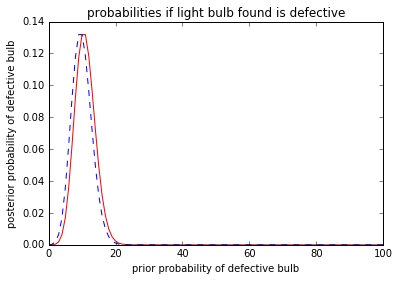

In [115]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(p_list,posterior_proba,'r',p_list,posterior_proba_non_def,'b--')
#plt.plot(p_list,posterior_proba,'r')
plt.title("probabilities if light bulb found is defective")
plt.xlabel("prior probability of defective bulb")
plt.ylabel("posterior probability of defective bulb")
plt.show()